In [88]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [89]:
file_path = r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv'

In [90]:
data = pd.read_csv( r'C:\Users\Jayesh vala\OneDrive - Saint Peters University\DS-670-capstone\Downtown_Parking_Lots.csv')


In [91]:
print("Original Data:")
print(data.head())

Original Data:
   OBJECTID  FACILITYID  INTID  SALESFORCEID  SUBTYPEID  \
0         2           2      2           0.0        0.0   
1         4           4      4           0.0        0.0   
2         5           5      5           0.0        0.0   
3         6           6      6           0.0        0.0   
4         7           7      7           0.0        NaN   

                                     NAME                         ADDRESS  \
0          SJ State University 7th Street                                   
1  SJ State University 10th Street Garage                                   
2               Cahill Lot 4 (Caltrain 4)   4 Cahill Street, San Jose, CA   
3               Cahill Lot 2 (Caltrain 2)  21 Cahill Street, San Jose, CA   
4               Cahill Lot 3 (Caltrain 3)                71 Cahill Street   

          OWNERSHIP  TOTALSPACECOUNT  EVSPACECOUNT  ...  PARKINGTYPE  \
0      SJSU Parking           1980.0           NaN  ...          NaN   
1      SJSU Parking    

In [92]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
OBJECTID               0
FACILITYID             0
INTID                  0
SALESFORCEID          50
SUBTYPEID             47
NAME                   0
ADDRESS                0
OWNERSHIP              0
TOTALSPACECOUNT        3
EVSPACECOUNT          81
ADASPACECOUNT         81
RESERVEDSPACECOUNT    82
VALIDATION            59
PARKINGTYPE           59
NUMBEROFLEVELS        81
PERMITS                3
BIPLEASE               3
BIPAREA                3
CREATIONDATE          48
LASTUPDATE             0
NOTES                  0
SHAPE_Length           0
SHAPE_Area             0
dtype: int64


In [93]:
columns_to_drop = ['SALESFORCEID', 'PERMITS', 'BIPLEASE','CREATIONDATE','NOTES','SHAPE_Length','SHAPE_Area','VALIDATION','BIPAREA','OBJECTID','INTID','SUBTYPEID']  # Replace with the actual column names you want to drop
data = data.drop(columns=columns_to_drop)

In [94]:
imputer = SimpleImputer(strategy='most_frequent')  # You can choose other strategies like 'median', 'most_frequent', etc.
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [95]:
print("\nPreprocessed Data:")
print(data_imputed.head())



# Save the preprocessed data with the calculated column to a new CSV file
data_imputed.to_csv('preprocessed_data.csv', index=False)




Preprocessed Data:
  FACILITYID                                    NAME  \
0          2          SJ State University 7th Street   
1          4  SJ State University 10th Street Garage   
2          5               Cahill Lot 4 (Caltrain 4)   
3          6               Cahill Lot 2 (Caltrain 2)   
4          7               Cahill Lot 3 (Caltrain 3)   

                          ADDRESS         OWNERSHIP TOTALSPACECOUNT  \
0                                      SJSU Parking          1980.0   
1                                      SJSU Parking          1490.0   
2   4 Cahill Street, San Jose, CA  City of San Jose           149.0   
3  21 Cahill Street, San Jose, CA  City of San Jose           162.0   
4                71 Cahill Street  City of San Jose            90.0   

  EVSPACECOUNT ADASPACECOUNT RESERVEDSPACECOUNT PARKINGTYPE NUMBEROFLEVELS  \
0          6.0          14.0               16.0         Lot            1.0   
1          6.0          14.0               16.0         Lot 

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
file_path = 'preprocessed_data.csv'
data = pd.read_csv(file_path)

In [98]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FACILITYID          89 non-null     int64  
 1   NAME                89 non-null     object 
 2   ADDRESS             89 non-null     object 
 3   OWNERSHIP           89 non-null     object 
 4   TOTALSPACECOUNT     89 non-null     float64
 5   EVSPACECOUNT        89 non-null     float64
 6   ADASPACECOUNT       89 non-null     float64
 7   RESERVEDSPACECOUNT  89 non-null     float64
 8   PARKINGTYPE         89 non-null     object 
 9   NUMBEROFLEVELS      89 non-null     float64
 10  LASTUPDATE          89 non-null     object 
dtypes: float64(5), int64(1), object(5)
memory usage: 7.8+ KB
None


In [99]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       FACILITYID  TOTALSPACECOUNT  EVSPACECOUNT  ADASPACECOUNT  \
count   89.000000        89.000000     89.000000      89.000000   
mean    48.089888       397.955056      6.033708      13.876404   
std     26.323875       467.298010      0.789842       1.594167   
min      2.000000        13.000000      0.000000       3.000000   
25%     26.000000        71.000000      6.000000      14.000000   
50%     48.000000       162.000000      6.000000      14.000000   
75%     70.000000       568.000000      6.000000      14.000000   
max     93.000000      1980.000000      9.000000      21.000000   

       RESERVEDSPACECOUNT  NUMBEROFLEVELS  
count           89.000000       89.000000  
mean            15.786517        1.314607  
std              2.129191        1.275606  
min              2.000000        1.000000  
25%             16.000000        1.000000  
50%             16.000000        1.000000  
75%             16.000000        1.000000  
max             26.0000

In [100]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
FACILITYID            0
NAME                  0
ADDRESS               0
OWNERSHIP             0
TOTALSPACECOUNT       0
EVSPACECOUNT          0
ADASPACECOUNT         0
RESERVEDSPACECOUNT    0
PARKINGTYPE           0
NUMBEROFLEVELS        0
LASTUPDATE            0
dtype: int64


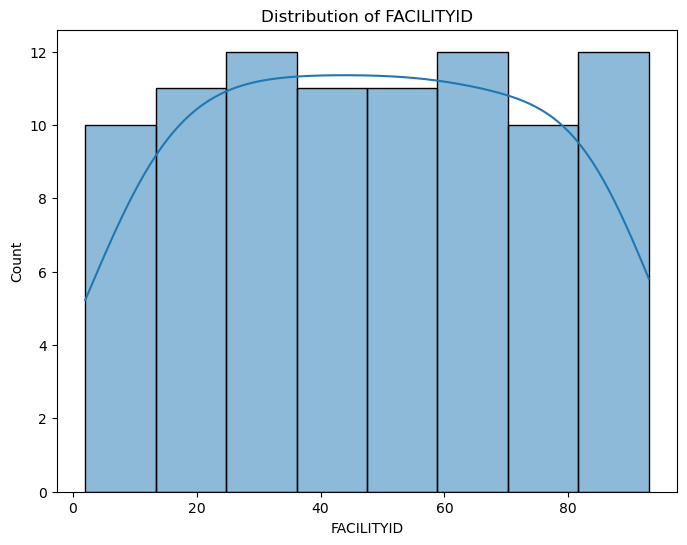

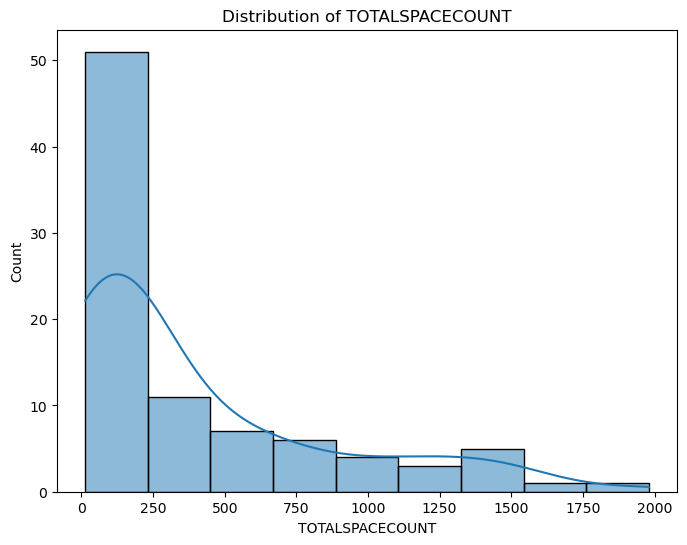

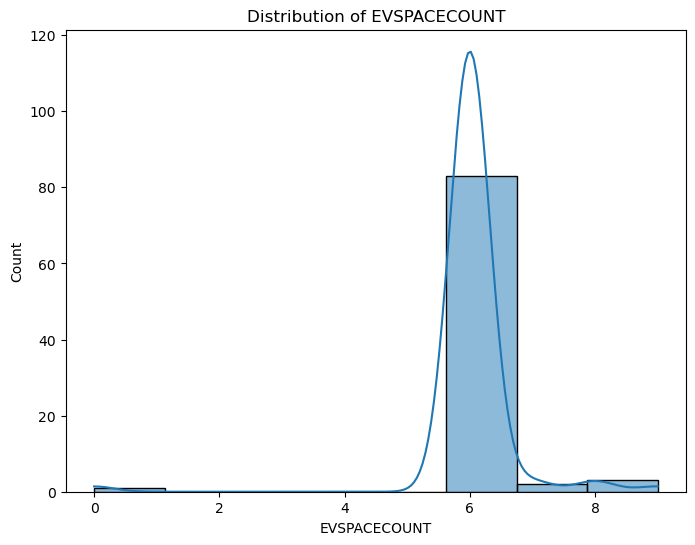

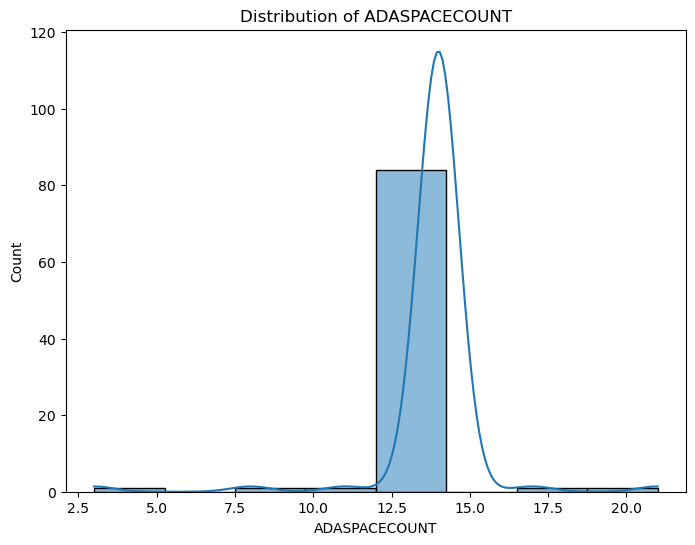

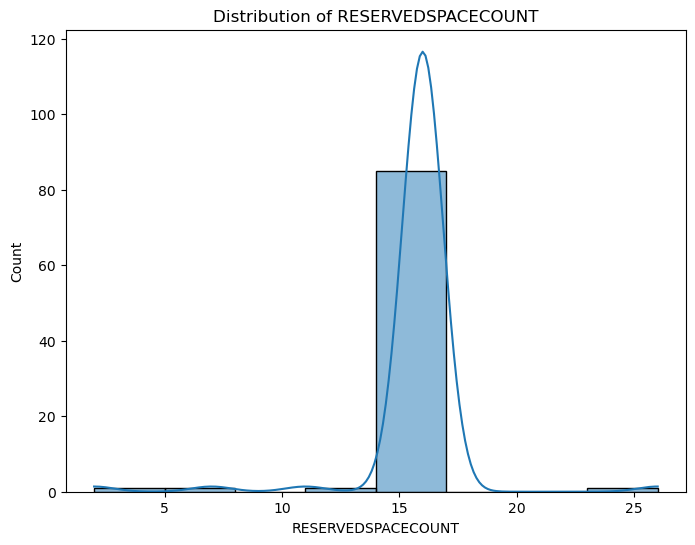

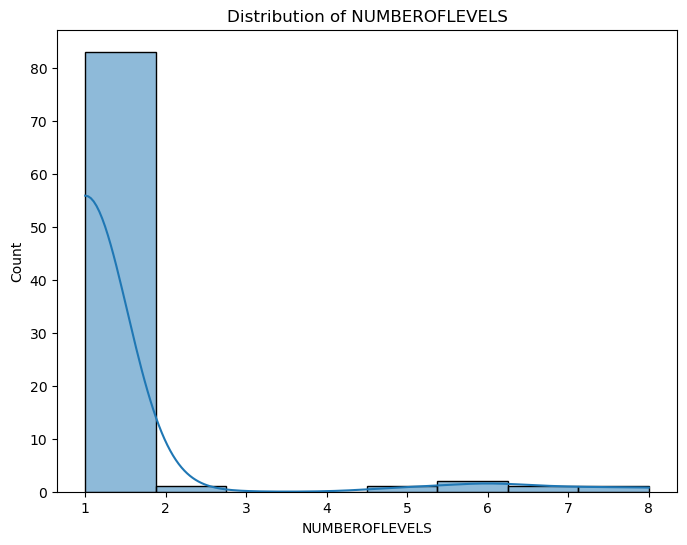

In [101]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

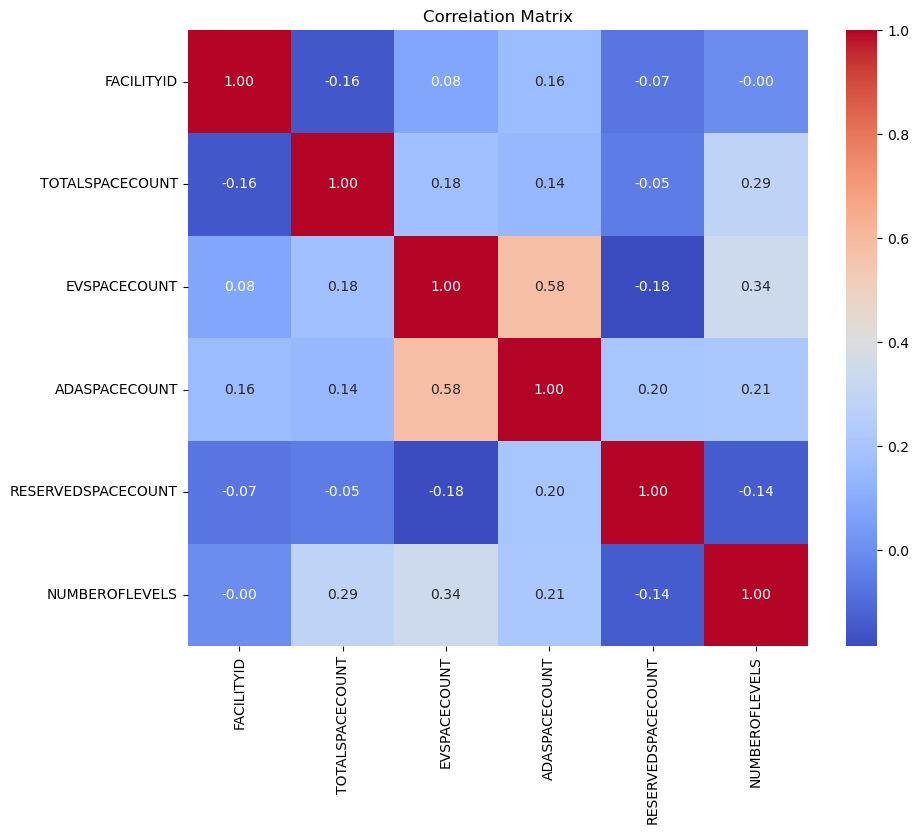

In [102]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

C:\Users\Jayesh vala\anaconda3\envs\ML\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


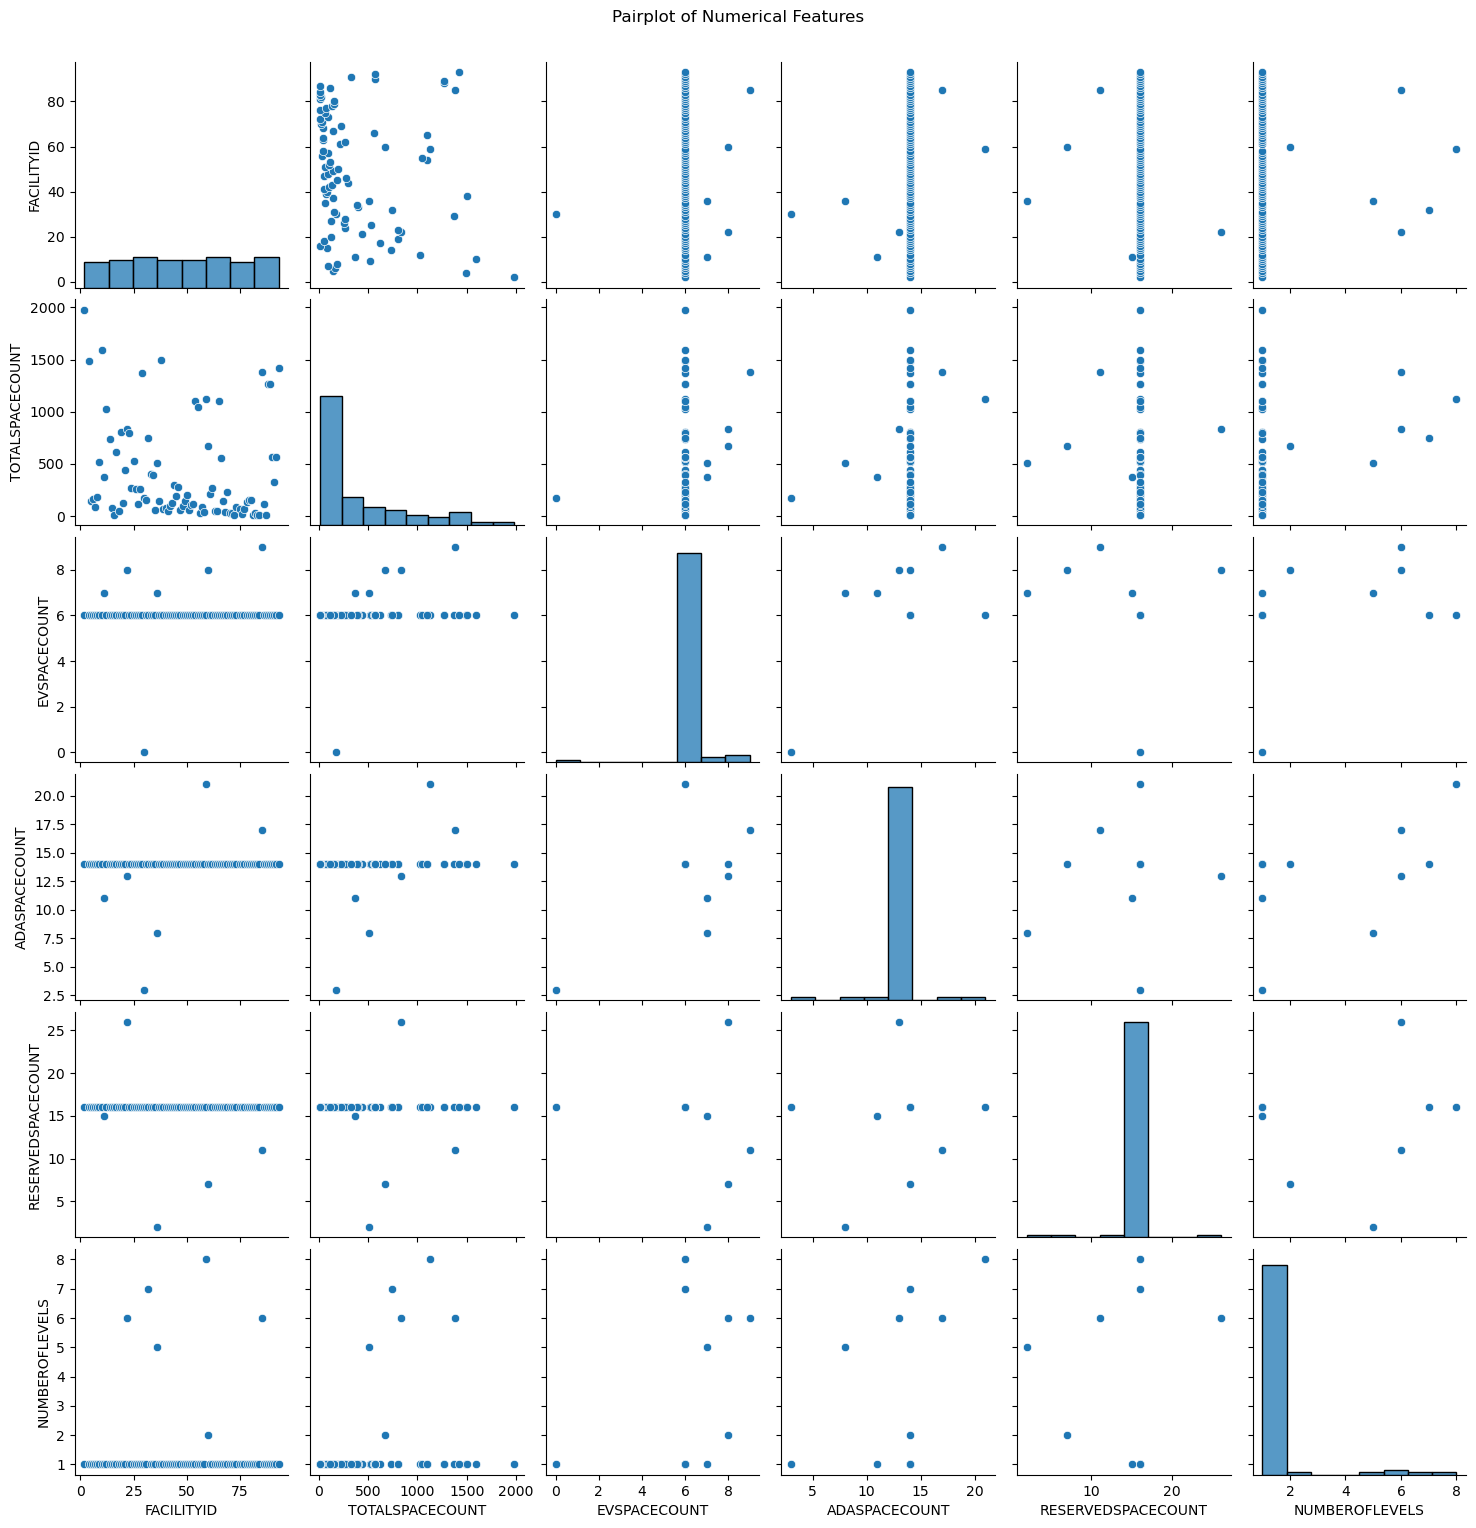

In [103]:
sns.pairplot(data[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_7600\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


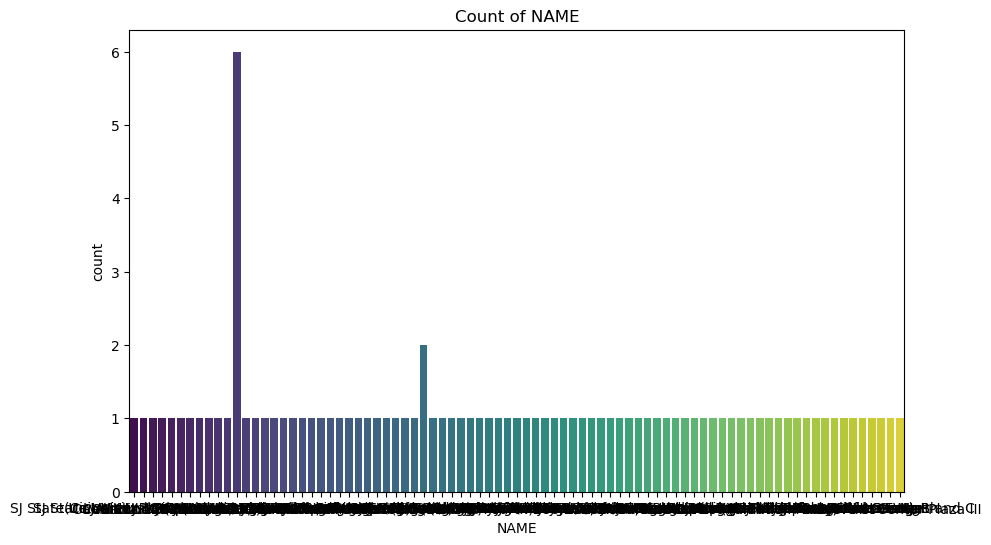

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_7600\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


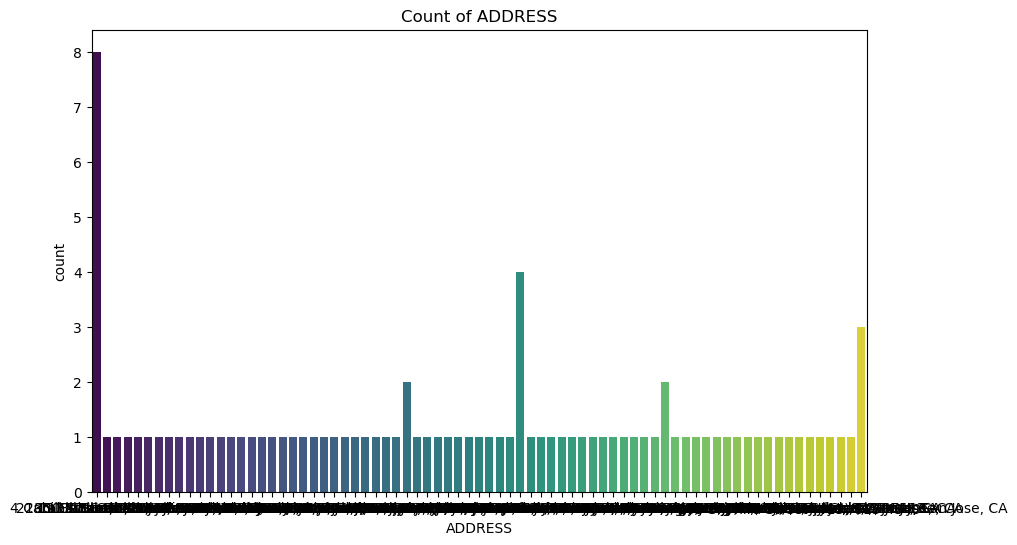

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_7600\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


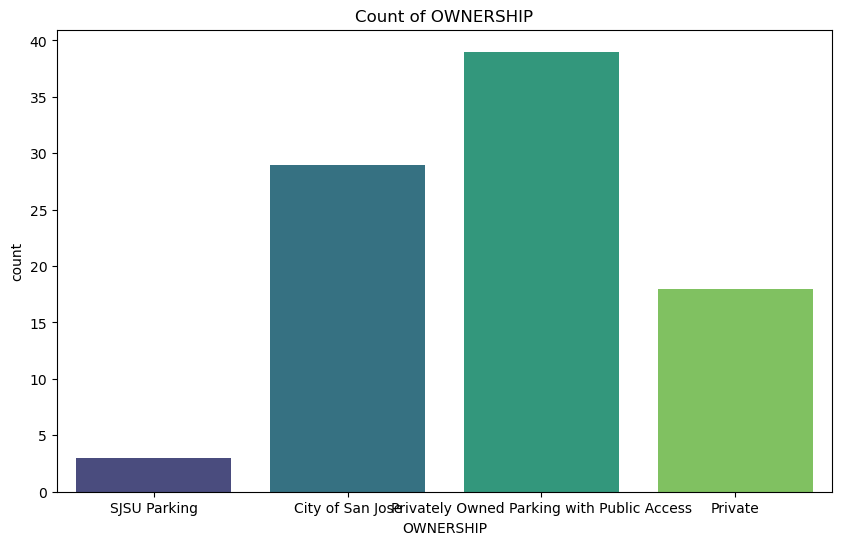

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_7600\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


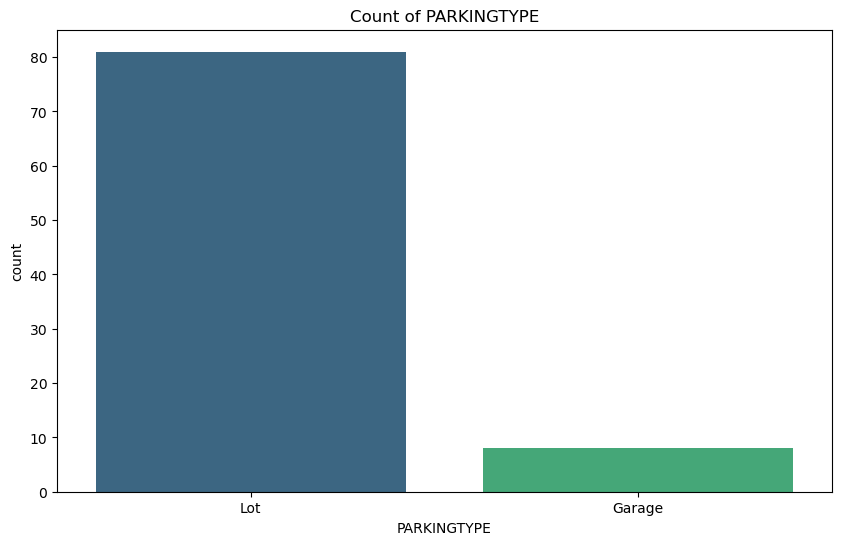

C:\Users\Jayesh vala\AppData\Local\Temp\ipykernel_7600\144808306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette="viridis")


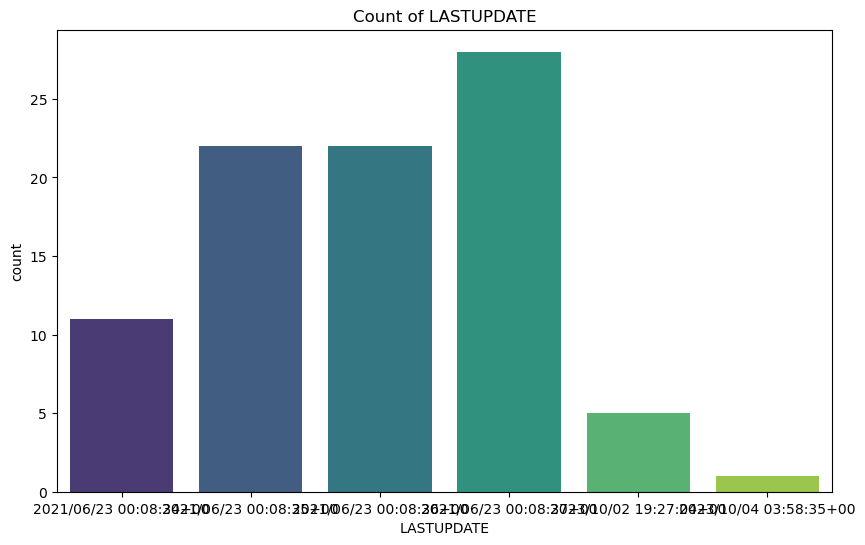

In [104]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data, palette="viridis")
    plt.title(f'Count of {feature}')
    plt.show()

In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

parking_data = pd.read_csv("preprocessed_data.csv")
target_column = 'TOTALSPACECOUNT'
X = parking_data.drop(columns=[target_column, 'NAME', 'ADDRESS'])
y = parking_data[target_column]

Final_Dataframe = pd.DataFrame({
    'Model': [],
    'Mean Squared Error': [],
    'R-squared': [],
    'RMSE': [],
    'MAPE': []
})
results_list = []
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Impute missing values for numeric columns
            ('scaler', StandardScaler())  # Standardize numeric features
        ]), numeric_features),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_features)
    ]
)

# Impute missing values in the target variable
y = y.fillna(y.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Append the regression model to the pipeline
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Create a DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Mean Squared Error', 'R-squared', 'RMSE', 'MAPE'])

# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = model_pipeline.score(X_test, y_test)
    rmse = np.sqrt(mse)
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Store results in the DataFrame
    results_list.append({
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r_squared,
        'RMSE': rmse,
        'MAPE': mape
    })

# Concatenate the list of DataFrames into the Final_Dataframe
Final_Dataframe = pd.concat([Final_Dataframe, pd.DataFrame(results_list)], ignore_index=True)

# Display the results table
Final_Dataframe


,Model,Mean Squared Error,R-squared,RMSE,MAPE
0,Linear Regression,183385.541765,0.375011,428.235381,298.093671
1,Decision Tree Regressor,210688.500000,0.281961,459.008170,323.176305
2,Random Forest Regressor,154943.122056,0.471945,393.628152,307.474460
3,Gradient Boosting Regressor,110159.301888,0.624571,331.902549,241.006704


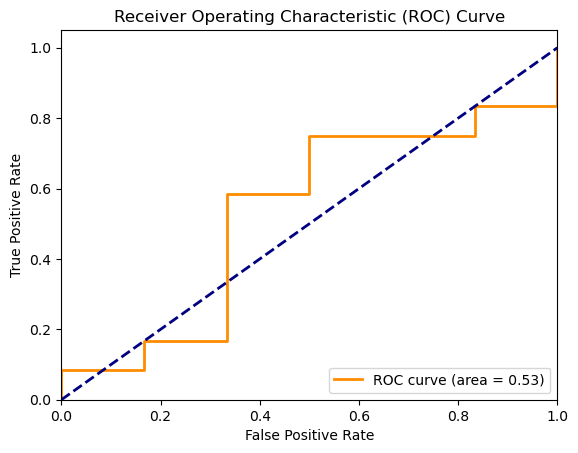

In [106]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Convert regression to binary classification (example: y > threshold)
threshold = 100  # Adjust this threshold based on your problem
y_binary = (y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the linear regression model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


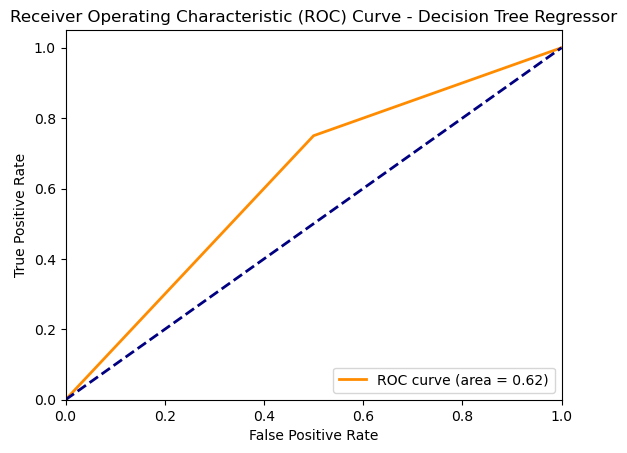

In [107]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Decision Tree Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree Regressor')
plt.legend(loc="lower right")
plt.show()


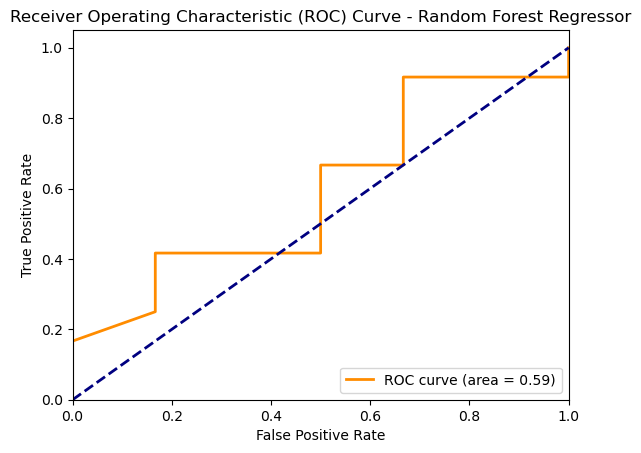

In [108]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Random Forest Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest Regressor')
plt.legend(loc="lower right")
plt.show()


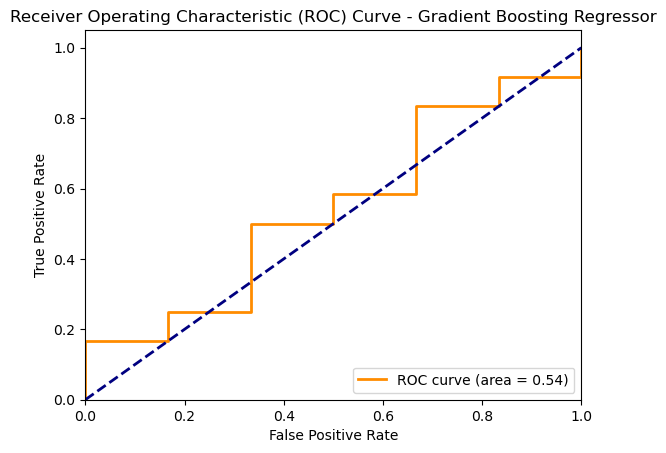

In [109]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', StandardScaler())
        ]), X.select_dtypes(include=['number']).columns),
        ('categorical', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), X.select_dtypes(exclude=['number']).columns)
    ]
)

# Append the Gradient Boosting Regressor model to the pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting Regressor')
plt.legend(loc="lower right")
plt.show()


In [110]:
# Iterate over models
for model_name, model in models:
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Print the predicted values
    print(f'Predicted values for {model_name}:')
    print(y_pred)
    print('\n')


Predicted values for Linear Regression:
[0.64390899 0.40931408 0.7527557  0.87983432 0.59288853 1.17550278
 0.44128395 0.40094823 0.97151204 0.82132805 0.9906991  0.70826589
 0.65561025 0.62384678 0.35773999 0.6513948  0.35937517 0.2986639 ]


Predicted values for Decision Tree Regressor:
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.]


Predicted values for Random Forest Regressor:
[0.56 0.07 0.79 0.86 0.75 1.   0.8  0.93 0.98 1.   0.98 0.51 0.96 0.23
 0.03 0.67 0.18 0.33]


Predicted values for Gradient Boosting Regressor:
[0.73036488 0.14811214 0.71727914 0.86028808 0.82212662 1.00112271
 0.99103168 1.01201676 0.91170756 0.99089471 0.98530337 0.488888
 0.92046018 0.41381594 0.04681749 0.90967515 0.04727055 0.06738427]




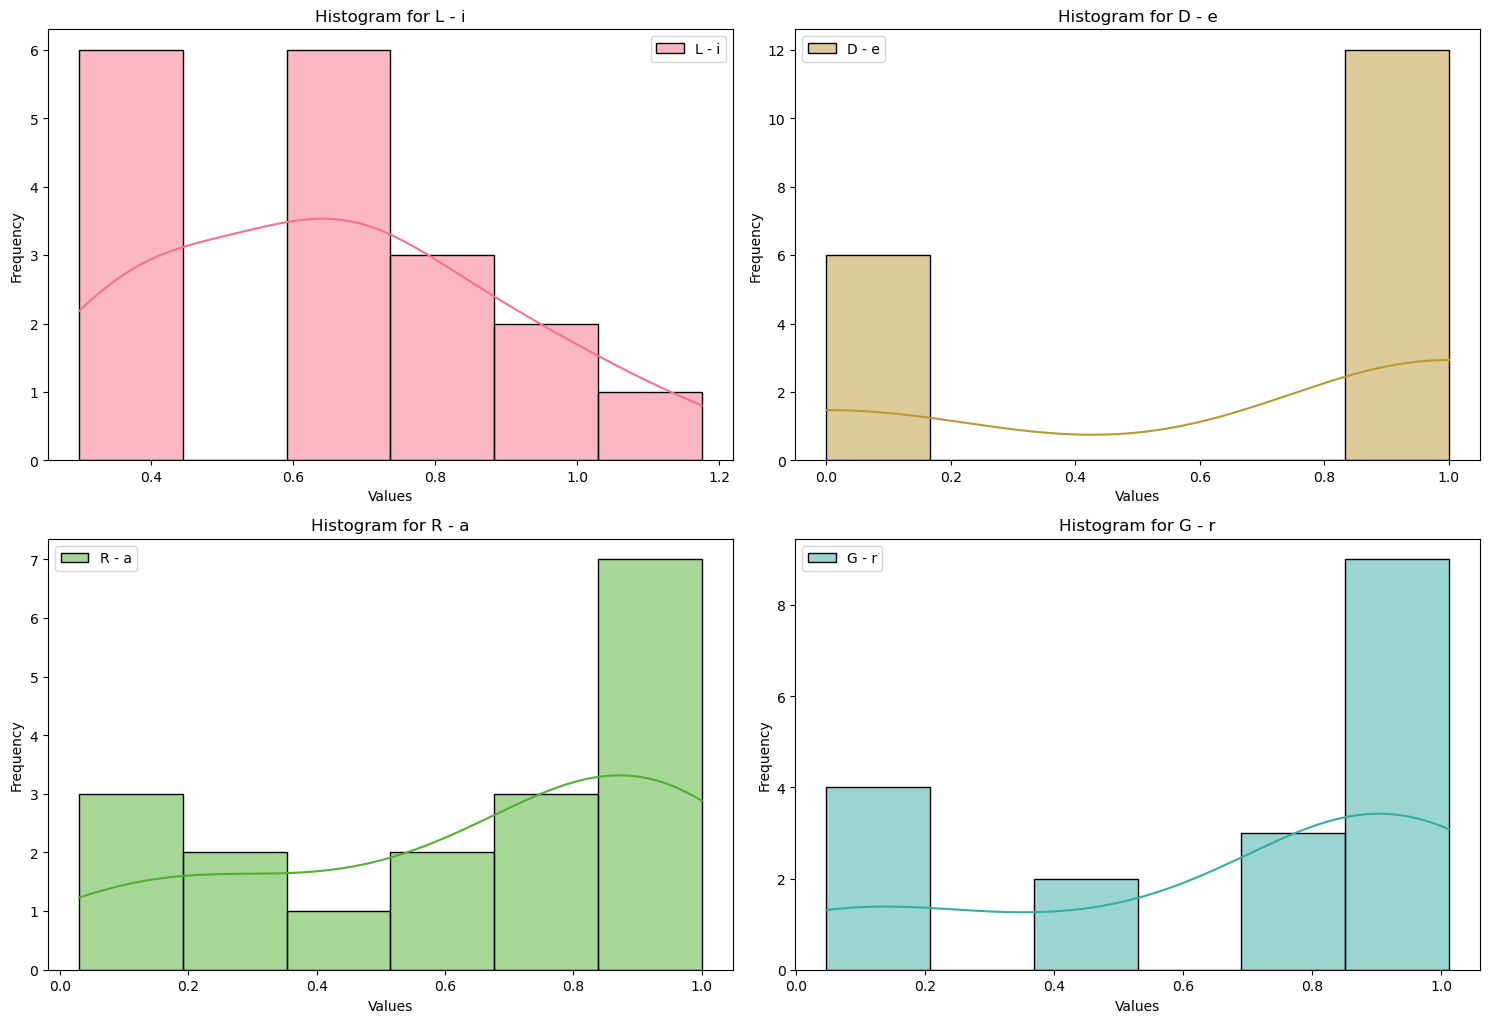

In [111]:
# Create a list to store results dataframes for each model
results_dfs = []

# Plot separate histograms for each model
plt.figure(figsize=(15, 15))  # Increase the figure size for better visibility

for i, (model_name, model) in enumerate(models, start=1):
    # Append the regression model to the pipeline
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)

    # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Model': model_name})
    results_dfs.append(results_df)

    # Plot histogram for the current model
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots, position i
    sns.histplot(data=results_df, x='Predicted', kde=True, color=sns.color_palette('husl')[i-1], label=f'{model_name[0]} - {model_name[1]}')
    plt.title(f'Histogram for {model_name[0]} - {model_name[1]}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [112]:
# Display the results table
print(Final_Dataframe)

# Model Comparison
best_model_mse = Final_Dataframe.loc[Final_Dataframe['Mean Squared Error'].idxmin()]
best_model_rmse = Final_Dataframe.loc[Final_Dataframe['RMSE'].idxmin()]
best_model_r_squared = Final_Dataframe.loc[Final_Dataframe['R-squared'].idxmax()]
best_model_mape = Final_Dataframe.loc[Final_Dataframe['MAPE'].idxmin()]

print("\nModel Comparison:")
print("Best Model (Minimum MSE):")
print(best_model_mse)

print("\nBest Model (Minimum RMSE):")
print(best_model_rmse)

print("\nBest Model (Maximum R-squared):")
print(best_model_r_squared)

print("\nBest Model (Minimum MAPE):")
print(best_model_mape)


                         Model  Mean Squared Error  R-squared        RMSE  \
0            Linear Regression       183385.541765   0.375011  428.235381   
1      Decision Tree Regressor       210688.500000   0.281961  459.008170   
2      Random Forest Regressor       154943.122056   0.471945  393.628152   
3  Gradient Boosting Regressor       110159.301888   0.624571  331.902549   

         MAPE  
0  298.093671  
1  323.176305  
2  307.474460  
3  241.006704  

Model Comparison:
Best Model (Minimum MSE):
Model                 Gradient Boosting Regressor
Mean Squared Error                  110159.301888
R-squared                                0.624571
RMSE                                   331.902549
MAPE                                   241.006704
Name: 3, dtype: object

Best Model (Minimum RMSE):
Model                 Gradient Boosting Regressor
Mean Squared Error                  110159.301888
R-squared                                0.624571
RMSE                                  

In [113]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Full pipeline including preprocessing
gbr_full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gbr_model)
])

# Train the model
gbr_full_pipeline.fit(X_train, y_train)

# Save the model to a file using pickle
with open('gradient_boosting_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(gbr_full_pipeline, model_file)

print("Gradient Boosting Regressor model saved successfully.")


Gradient Boosting Regressor model saved successfully.
